In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg' 

если кто-то вдруг смотрит этот ноутбук: принимаю поздравления! за 2.5 часа я научилась импортировать свои модули

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('/Applications/programs317/task3/src')) # or the path to your source code
sys.path.insert(0, module_path)
from ensembles import RandomForestMSE, GradientBoostingMSE

In [4]:
%load_ext autoreload
%autoreload 2 

# Предобработка

In [5]:
data = pd.read_csv("/Users/polinakrivula/Downloads/kc_house_data.csv")

In [6]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.shape

(21613, 21)

In [8]:
data.id.nunique()

21436

id имеет смысл удалить

In [9]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
print('We do not need to worry about missing values.') if data.count().min() == data.shape[0] else print('oops')

We do not need to worry about missing values.


пропусков нет

In [11]:
data['date'] = pd.to_datetime(data.date)

In [12]:
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


разобьем дату на год, месяц, день недели, день месяца, саму дату удалим

In [13]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.strftime('%m')
data['day_week'] = data['date'].dt.strftime('%w')
data['day_month'] = data['date'].dt.strftime('%d')

In [14]:
data.groupby('day_week')['price'].mean()

day_week
0    537103.413043
1    543757.960478
2    541054.204666
3    538534.832066
4    531543.796695
5    544220.936228
6    564950.738676
Name: price, dtype: float64

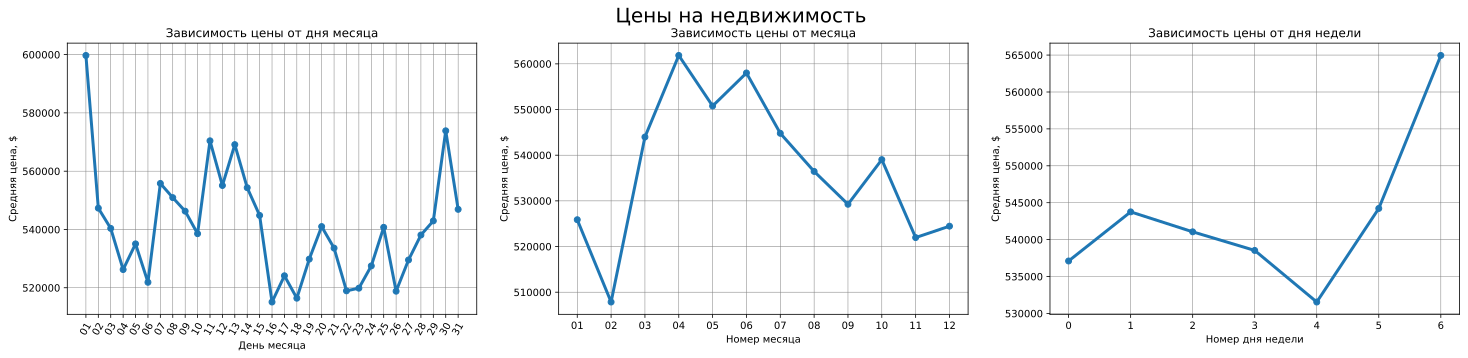

In [15]:

fig, ax = plt.subplots(1, 3, figsize=(25,5))
plt.suptitle('Цены на недвижимость', fontsize=20)

plt.subplot(1, 3, 1)
plt.title('Зависимость цены от дня месяца')
plt.xlabel('День месяца')
plt.xticks(rotation=60)
plt.ylabel('Средняя цена, $')
plt.plot(data.groupby('day_month')['price'].mean(), marker='o', linewidth=3)
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 3, 2)
plt.title('Зависимость цены от месяца')
plt.xlabel('Номер месяца')
plt.ylabel('Средняя цена, $')
plt.plot(data.groupby('month')['price'].mean(), marker='o', linewidth=3)
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 3, 3)
plt.title('Зависимость цены от дня недели')
plt.xlabel('Номер дня недели')
plt.ylabel('Средняя цена, $')
plt.plot(data.groupby('day_week')['price'].mean(), marker='o', linewidth=3)
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.savefig("TASK3 price.pdf", bbox_inches = 'tight')

plt.show()

In [16]:
data = data.drop(columns=['id', 'date'], axis=1)

In [17]:
for i in data.columns:
    print(i, data[i].dtype, data[i].nunique())

price float64 4028
bedrooms int64 13
bathrooms float64 30
sqft_living int64 1038
sqft_lot int64 9782
floors float64 6
waterfront int64 2
view int64 5
condition int64 5
grade int64 12
sqft_above int64 946
sqft_basement int64 306
yr_built int64 116
yr_renovated int64 70
zipcode int64 70
lat float64 5034
long float64 752
sqft_living15 int64 777
sqft_lot15 int64 8689
year int64 2
month object 12
day_week object 7
day_month object 31


In [18]:
data['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

Закодируем признаки с небольшим количеством целочисленных значений с помощью One Hot Encoding. Это waterfront, zipcode.

Перед кодированием разобьем выборку на обучение и контроль.

In [19]:
cat = ['waterfront', 
       'zipcode']

In [20]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [21]:
target = data['price']
data = data.drop(columns=['price'], axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, random_state=241)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(X_train[cat])
X_train_encoded = enc.transform(X_train[cat])
X_test_encoded = enc.transform(X_test[cat])

X_train_encoded = pd.DataFrame(X_train_encoded.toarray())
X_test_encoded = pd.DataFrame(X_test_encoded.toarray())

for i in data.columns:
    if not i in cat:
        X_train_encoded[i] = np.copy(X_train[i])
        X_test_encoded[i] = np.copy(X_test[i])

X_train = X_train_encoded
X_test = X_test_encoded

In [23]:
X_train.shape

(15129, 92)

# Параметры RandomForestMSE

Изучите зависимость RMSE на отложенной выборке и время работы алгоритма в зависимости от следующих факторов:

• количество деревьев в ансамбле

• размерность подвыборки признаков для одного дерева

• максимальная глубина дерева (дополнительно разберите случай, когда глубина неограничена)

начнем с количества деревьев, все параметры кроме этого по умолчанию

In [24]:
model = RandomForestMSE(n_estimators=500)
history_encoded = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, random_state=241)

In [26]:
model = RandomForestMSE(n_estimators=500)
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [27]:
from category_encoders import TargetEncoder
enc = TargetEncoder(cols=cat, smoothing=0.5, min_samples_leaf=0.5)
enc.fit(X_train, y_train)
X_train_catenc = enc.transform(X_train)
X_test_catenc = enc.transform(X_test)

In [28]:
history_catenc = model.fit(X_train_catenc.to_numpy(), y_train.to_numpy(), 
                           X_test_catenc.to_numpy(), y_test.to_numpy())

In [29]:
lst = list(range(0, 501, 25))
lst[0] = 1

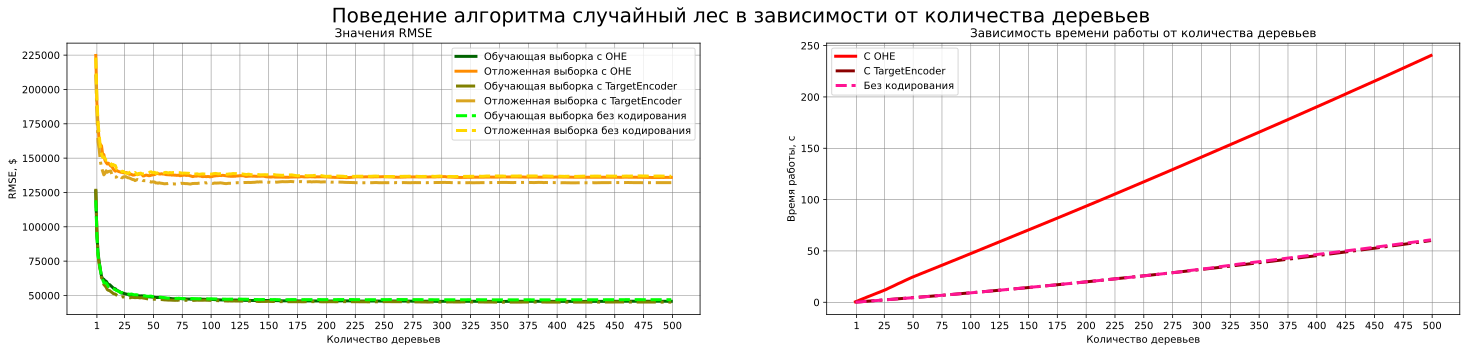

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
plt.suptitle('Поведение алгоритма случайный лес в зависимости от количества деревьев', fontsize=20)

plt.subplot(1, 2, 1)
plt.title('Значения RMSE')
plt.xlabel('Количество деревьев')
plt.ylabel('RMSE, $')
plt.plot(history_encoded['rmse_train'], color='darkgreen', linewidth=3, 
         label='Обучающая выборка с OHE')
plt.plot(history_encoded['rmse_val'], color='darkorange', linewidth=3, label='Отложенная выборка с OHE')
plt.plot(history_catenc['rmse_train'], color='olive', linestyle='-.',
         linewidth=3, label='Обучающая выборка с TargetEncoder')
plt.plot(history_catenc['rmse_val'], color='goldenrod', linewidth=3, linestyle='-.',
         label='Отложенная выборка с TargetEncoder')
plt.plot(history['rmse_train'], color='lime', linestyle='--', 
         linewidth=3, label='Обучающая выборка без кодирования')
plt.plot(history['rmse_val'], color='gold', linestyle='--',
         linewidth=3, label='Отложенная выборка без кодирования')
plt.xticks(lst)
plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 2, 2)
plt.title('Зависимость времени работы от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('Время работы, с')
plt.plot(np.cumsum(history_encoded['time']), color='red', linewidth=3, label='С OHE')
plt.plot(np.cumsum(history_catenc['time']), linestyle='-.', color='darkred', linewidth=3, label='С TargetEncoder')
plt.plot(np.cumsum(history['time']), color='deeppink', linestyle='--', 
         linewidth=3, label='Без кодирования')
plt.xticks(lst)
plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)


plt.savefig("TASK3 RF number of trees.pdf", bbox_inches = 'tight')

plt.show()

In [32]:
np.argmin(history_encoded['rmse_val'])

217

In [34]:
np.min(history['rmse_val'])

136534.4468396584

In [35]:
np.min(history_encoded['rmse_val'])

135797.2270164167

In [36]:
np.min(history_catenc['rmse_val'])

131125.87049345934

In [37]:
np.argmin(history_catenc['rmse_val'])

82

вывод: кодирование стоит оставить со счетчиками

In [38]:
X_train = X_train_catenc
X_test = X_test_catenc

размерность подвыборки признаков для одного дерева

In [39]:
time_250 = []
rmse_train_250 = []
rmse_val_250 = []
time_1 = []
rmse_train_1 = []
rmse_val_1 = []

for i in range(1, X_train.shape[1] + 1):
    model = RandomForestMSE(n_estimators=82, feature_subsample_size=i)
    history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
    time_250.append(np.sum(history['time']))
    rmse_train_250.append(history['rmse_train'][-1])
    rmse_val_250.append(history['rmse_val'][-1])
    
    model = RandomForestMSE(n_estimators=1, feature_subsample_size=i)
    history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
    time_1.append(np.sum(history['time']))
    rmse_train_1.append(history['rmse_train'][-1])
    rmse_val_1.append(history['rmse_val'][-1])

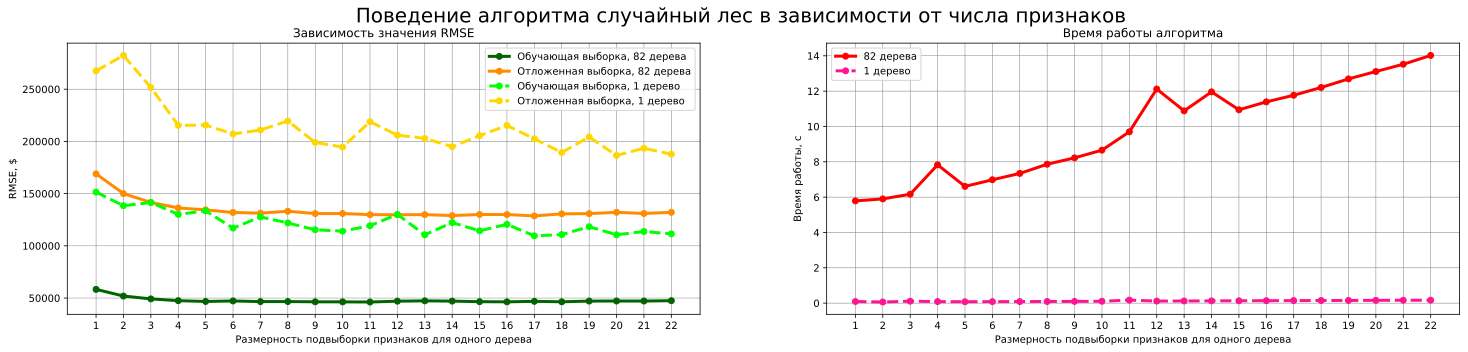

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
plt.suptitle('Поведение алгоритма случайный лес в зависимости от числа признаков', fontsize=20)

plt.subplot(1, 2, 1)
plt.title('Зависимость значения RMSE')
plt.xlabel('Размерность подвыборки признаков для одного дерева')
plt.ylabel('RMSE, $')
plt.xticks(np.arange(1, X_train.shape[1] + 1))
plt.plot(np.arange(1, X_train.shape[1] + 1), rmse_train_250, 
         color='darkgreen', marker='o', linewidth=3, label='Обучающая выборка, 82 дерева')
plt.plot(np.arange(1, X_train.shape[1] + 1), rmse_val_250, 
         color='darkorange', marker='o', linewidth=3, label='Отложенная выборка, 82 дерева')
plt.plot(np.arange(1, X_train.shape[1] + 1), rmse_train_1, 
         color='lime', marker='o', linestyle='--', linewidth=3, label='Обучающая выборка, 1 дерево')
plt.plot(np.arange(1, X_train.shape[1] + 1), rmse_val_1, 
         color='gold', marker='o', linestyle='--', linewidth=3, label='Отложенная выборка, 1 дерево')
plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 2, 2)
plt.title('Время работы алгоритма')
plt.xlabel('Размерность подвыборки признаков для одного дерева')
plt.ylabel('Время работы, с')
plt.xticks(np.arange(1, X_train.shape[1] + 1))
plt.plot(np.arange(1, X_train.shape[1] + 1), time_250, 
         color='red', marker='o', linewidth=3, label='82 дерева')
plt.plot(np.arange(1, X_train.shape[1] + 1), time_1, 
         color='deeppink', marker='o', linestyle='--', linewidth=3, label='1 дерево')
plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)


plt.savefig("TASK3 RF features.pdf", bbox_inches = 'tight')

plt.show()

In [41]:
np.argmin(rmse_val_250)

16

In [42]:
rmse_val_250[16]

128645.97488558361

In [43]:
rmse_val_250

[168920.26628032792,
 150011.16627336544,
 141554.87793582142,
 136256.99012395614,
 134469.62246367248,
 131949.6935192266,
 131258.9931734092,
 133116.4315817059,
 130889.03351608153,
 130929.22668965586,
 129846.27051842018,
 129738.60768737776,
 129883.8373834219,
 128966.8740109872,
 130023.49862449514,
 129956.78508547237,
 128645.97488558361,
 130638.60298254785,
 130825.96183498875,
 132097.874416248,
 130986.25918195158,
 132065.8787505155]

максимальная глубина дерева. при этом 17 признаков, 82 дерева.

In [44]:
time = []
rmse_train = []
rmse_val = []
max_depth = []

for i in range(1, 35):
    model = RandomForestMSE(n_estimators=82, feature_subsample_size=17, max_depth=i)
    history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
    time.append(np.sum(history['time']))
    rmse_train.append(history['rmse_train'][-1])
    rmse_val.append(history['rmse_val'][-1])
    max_depth.append(i)

In [45]:
model = RandomForestMSE(n_estimators=82, feature_subsample_size=17, max_depth=None)
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
time.append(np.sum(history['time']))
rmse_train.append(history['rmse_train'][-1])
rmse_val.append(history['rmse_val'][-1])
max_depth.append('inf')

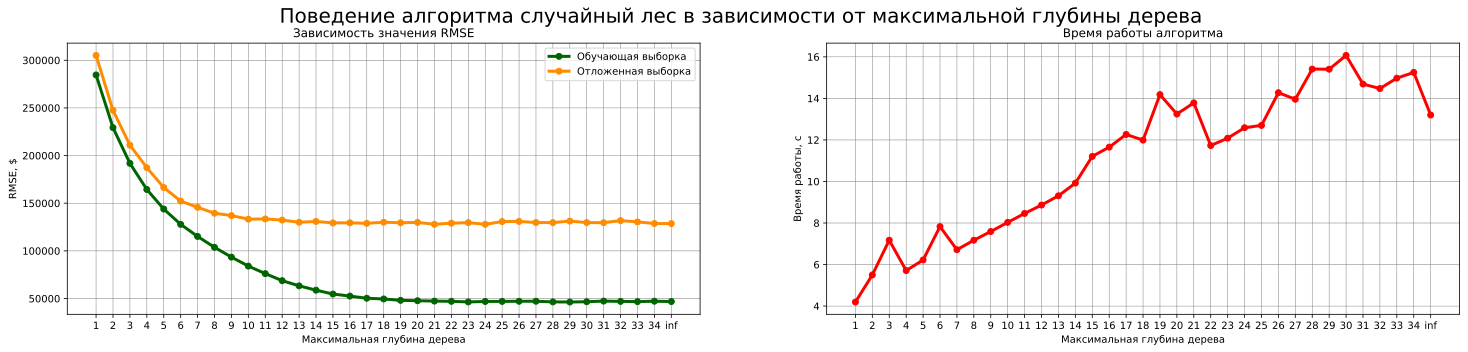

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
plt.suptitle('Поведение алгоритма случайный лес в зависимости от максимальной глубины дерева', fontsize=20)

plt.subplot(1, 2, 1)
plt.title('Зависимость значения RMSE')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('RMSE, $')
plt.plot(max_depth, rmse_train, 
         color='darkgreen', marker='o', linewidth=3, label='Обучающая выборка')
plt.plot(max_depth, rmse_val, 
         color='darkorange', marker='o', linewidth=3, label='Отложенная выборка')

plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 2, 2)
plt.title('Время работы алгоритма')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Время работы, с')
plt.plot(max_depth, time, color='red', marker='o', linewidth=3)

plt.grid(which='major', color = 'grey', linewidth = 0.5)


plt.savefig("TASK3 RF max_depth.pdf", bbox_inches = 'tight')

plt.show()

In [47]:
np.min(rmse_val)

127828.9372062913

In [48]:
np.argmin(rmse_val)

23

# Градиентный бустинг

количество деревьев в ансамбле

In [49]:
model = GradientBoostingMSE(n_estimators=1000)
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [50]:
lst = list(range(0, 1001, 50))
lst[0] = 1

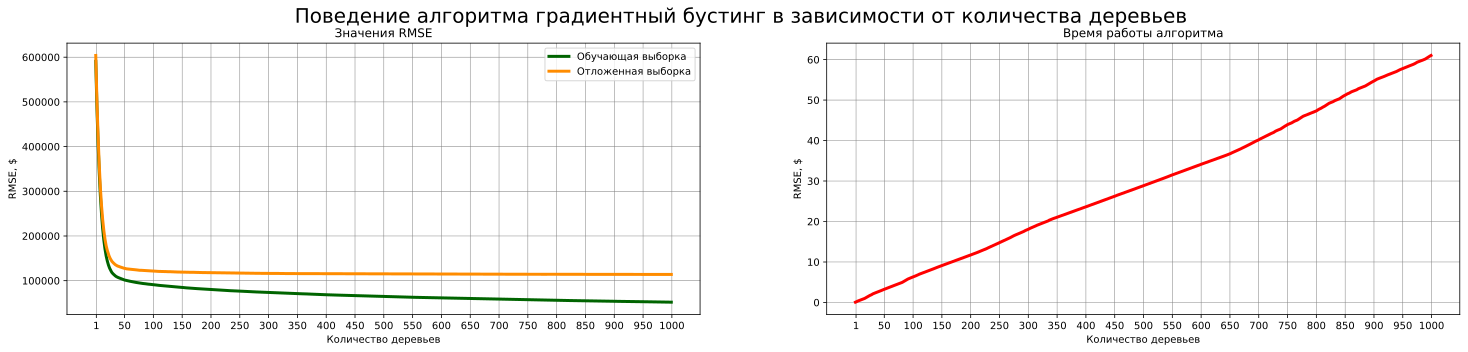

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
plt.suptitle('Поведение алгоритма градиентный бустинг в зависимости от количества деревьев', fontsize=20)

plt.subplot(1, 2, 1)
plt.title('Значения RMSE')
plt.xlabel('Количество деревьев')
plt.ylabel('RMSE, $')
plt.plot(history['rmse_train'], color='darkgreen', linewidth=3, label='Обучающая выборка')
plt.plot(history['rmse_val'], color='darkorange', linewidth=3, label='Отложенная выборка')
plt.xticks(lst)
plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 2, 2)
plt.title('Время работы алгоритма')
plt.xlabel('Количество деревьев')
plt.ylabel('RMSE, $')
plt.plot(np.cumsum(history['time']), color='red', linewidth=3)
plt.xticks(lst)
plt.grid(which='major', color = 'grey', linewidth = 0.5)


plt.savefig("TASK3 GB number of trees.pdf", bbox_inches = 'tight')

plt.show()

In [52]:
np.min(history['rmse_val'])

113899.51850209288

In [53]:
np.argmin(history['rmse_val'])

967

размерность подвыборки признаков для одного дерева


In [54]:
time_200 = []
rmse_train_200 = []
rmse_val_200 = []
time_1 = []
rmse_train_1 = []
rmse_val_1 = []

for i in range(1, X_train.shape[1] + 1):
    model = GradientBoostingMSE(n_estimators=967, feature_subsample_size=i)
    history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
    time_200.append(np.sum(history['time']))
    rmse_train_200.append(history['rmse_train'][-1])
    rmse_val_200.append(history['rmse_val'][-1])
    
    model = RandomForestMSE(n_estimators=1, feature_subsample_size=i)
    history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
    time_1.append(np.sum(history['time']))
    rmse_train_1.append(history['rmse_train'][-1])
    rmse_val_1.append(history['rmse_val'][-1])

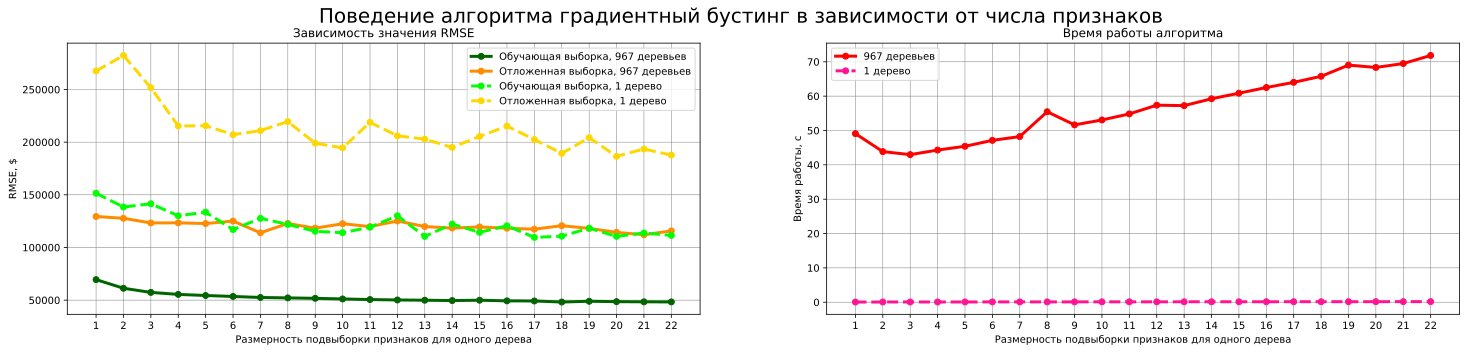

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
plt.suptitle('Поведение алгоритма градиентный бустинг в зависимости от числа признаков', fontsize=20)

plt.subplot(1, 2, 1)
plt.title('Зависимость значения RMSE')
plt.xlabel('Размерность подвыборки признаков для одного дерева')
plt.ylabel('RMSE, $')
plt.xticks(np.arange(1, X_train.shape[1] + 1))
plt.plot(np.arange(1, X_train.shape[1] + 1), rmse_train_200, 
         color='darkgreen', marker='o', linewidth=3, label='Обучающая выборка, 967 деревьев')
plt.plot(np.arange(1, X_train.shape[1] + 1), rmse_val_200, 
         color='darkorange', marker='o', linewidth=3, label='Отложенная выборка, 967 деревьев')
plt.plot(np.arange(1, X_train.shape[1] + 1), rmse_train_1, 
         color='lime', marker='o', linestyle='--', linewidth=3, label='Обучающая выборка, 1 дерево')
plt.plot(np.arange(1, X_train.shape[1] + 1), rmse_val_1, 
         color='gold', marker='o', linestyle='--', linewidth=3, label='Отложенная выборка, 1 дерево')
plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 2, 2)
plt.title('Время работы алгоритма')
plt.xlabel('Размерность подвыборки признаков для одного дерева')
plt.ylabel('Время работы, с')
plt.xticks(np.arange(1, X_train.shape[1] + 1))
plt.plot(np.arange(1, X_train.shape[1] + 1), time_200, 
         color='red', marker='o', linewidth=3, label='967 деревьев')
plt.plot(np.arange(1, X_train.shape[1] + 1), time_1, 
         color='deeppink', marker='o', linestyle='--', linewidth=3, label='1 дерево')
plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)


plt.savefig("TASK3 GB features.pdf", bbox_inches = 'tight')

plt.show()

In [56]:
np.min(rmse_val_200)

112095.56814277719

In [57]:
np.argmin(rmse_val_200)

20

максимальная глубина дерева (дополнительно разберите случай, когда глубина неограничена). 21 признаков, 967 деревьев.

In [60]:
time = []
rmse_train = []
rmse_val = []
max_depth = []

for i in range(1, 20):
    model = GradientBoostingMSE(n_estimators=967, feature_subsample_size=21, max_depth=i)
    history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
    time.append(np.sum(history['time']))
    rmse_train.append(history['rmse_train'][-1])
    rmse_val.append(history['rmse_val'][-1])
    max_depth.append(i)

In [61]:
model = GradientBoostingMSE(n_estimators=967, feature_subsample_size=21, max_depth=None)
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
time.append(np.sum(history['time']))
rmse_train.append(history['rmse_train'][-1])
rmse_val.append(history['rmse_val'][-1])
max_depth.append('inf')

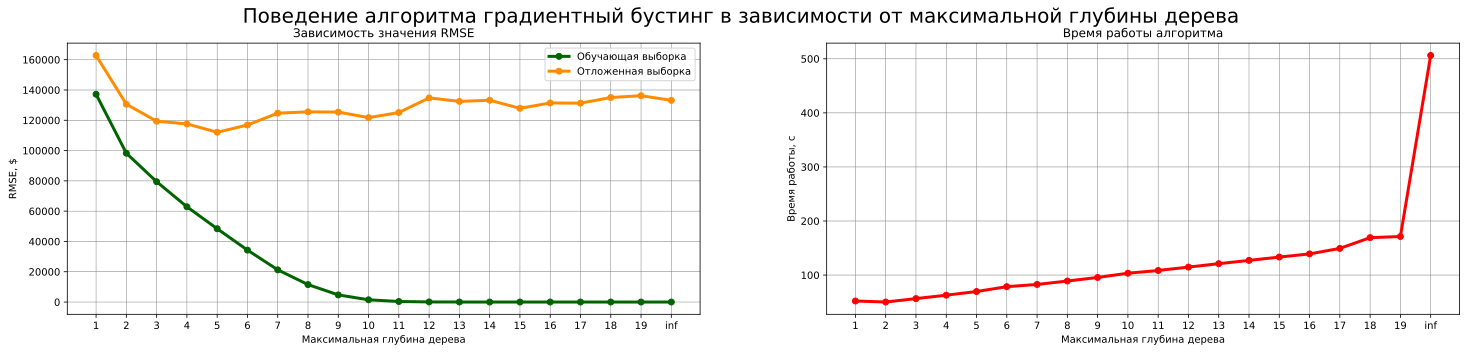

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
plt.suptitle('Поведение алгоритма градиентный бустинг в зависимости от максимальной глубины дерева', fontsize=20)

plt.subplot(1, 2, 1)
plt.title('Зависимость значения RMSE')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('RMSE, $')
# plt.xticks(max_depth)
plt.plot(max_depth, rmse_train, 
         color='darkgreen', marker='o', linewidth=3, label='Обучающая выборка')
plt.plot(max_depth, rmse_val, 
         color='darkorange', marker='o', linewidth=3, label='Отложенная выборка')

plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 2, 2)
plt.title('Время работы алгоритма')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Время работы, с')
# plt.xticks(max_depth)
plt.plot(max_depth, time, color='red', marker='o', linewidth=3)

plt.grid(which='major', color = 'grey', linewidth = 0.5)


plt.savefig("TASK3 GB max_depth.pdf", bbox_inches = 'tight')

plt.show()

In [63]:
np.min(rmse_val)

112095.56814277719

In [64]:
np.argmin(rmse_val)

4

выбранный learning_rate (каждый новый алгоритм добавляется в композицию с коэффициентом
α · learning_rate )

число 967, признаков 21, глубина 5.

In [65]:
rate = np.arange(0.05, 1.01, 0.05)

In [66]:
time = []
rmse_train = []
rmse_val = []

for i in rate:
    model = GradientBoostingMSE(n_estimators=967, feature_subsample_size=21, max_depth=5, learning_rate=i)
    history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
    time.append(np.sum(history['time']))
    rmse_train.append(history['rmse_train'][-1])
    rmse_val.append(history['rmse_val'][-1])
    max_depth.append(i)

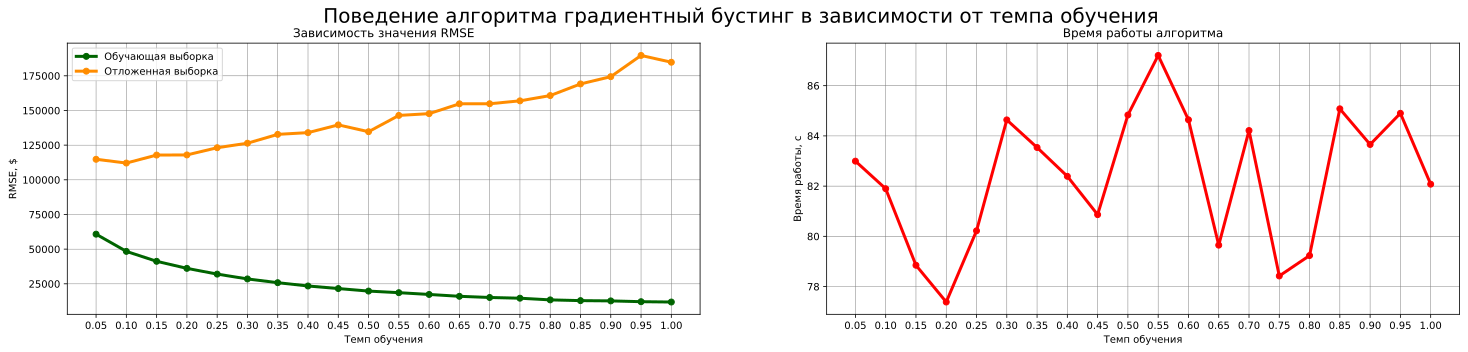

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
plt.suptitle('Поведение алгоритма градиентный бустинг в зависимости от темпа обучения', fontsize=20)

plt.subplot(1, 2, 1)
plt.title('Зависимость значения RMSE')
plt.xlabel('Темп обучения')
plt.ylabel('RMSE, $')
plt.xticks(rate)
plt.plot(rate, rmse_train, 
         color='darkgreen', marker='o', linewidth=3, label='Обучающая выборка')
plt.plot(rate, rmse_val, 
         color='darkorange', marker='o', linewidth=3, label='Отложенная выборка')

plt.legend()
plt.grid(which='major', color = 'grey', linewidth = 0.5)

plt.subplot(1, 2, 2)
plt.title('Время работы алгоритма')
plt.xlabel('Темп обучения')
plt.ylabel('Время работы, с')
plt.xticks(rate)
plt.plot(rate, time, color='red', marker='o', linewidth=3)

plt.grid(which='major', color = 'grey', linewidth = 0.5)


plt.savefig("TASK3 GB rate.pdf", bbox_inches = 'tight')

plt.show()

# Сверху

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
tree = DecisionTreeRegressor(max_depth=10,
                                         max_features=5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=5)

In [31]:
coef = []

In [32]:
coef.append(tree.feature_importances_)

In [33]:
coef.append(tree.feature_importances_)

In [34]:
coef

[array([2.85009199e-03, 5.23446430e-02, 2.65530025e-02, 8.09582948e-03,
        5.78245360e-03, 1.38613093e-02, 1.76311441e-02, 7.36861772e-04,
        3.51980877e-01, 1.12495450e-01, 1.09460439e-01, 5.19379464e-02,
        1.88064445e-04, 2.62819534e-02, 9.42501532e-02, 6.62268377e-02,
        2.29059888e-02, 2.15627788e-02, 1.70069005e-03, 6.55095148e-04,
        6.84899885e-03, 5.64939129e-03]),
 array([2.85009199e-03, 5.23446430e-02, 2.65530025e-02, 8.09582948e-03,
        5.78245360e-03, 1.38613093e-02, 1.76311441e-02, 7.36861772e-04,
        3.51980877e-01, 1.12495450e-01, 1.09460439e-01, 5.19379464e-02,
        1.88064445e-04, 2.62819534e-02, 9.42501532e-02, 6.62268377e-02,
        2.29059888e-02, 2.15627788e-02, 1.70069005e-03, 6.55095148e-04,
        6.84899885e-03, 5.64939129e-03])]

In [37]:
np.mean(coef, axis=0)

array([2.85009199e-03, 5.23446430e-02, 2.65530025e-02, 8.09582948e-03,
       5.78245360e-03, 1.38613093e-02, 1.76311441e-02, 7.36861772e-04,
       3.51980877e-01, 1.12495450e-01, 1.09460439e-01, 5.19379464e-02,
       1.88064445e-04, 2.62819534e-02, 9.42501532e-02, 6.62268377e-02,
       2.29059888e-02, 2.15627788e-02, 1.70069005e-03, 6.55095148e-04,
       6.84899885e-03, 5.64939129e-03])

135686.13051556374

In [49]:
model = RandomForestMSE(n_estimators=250, feature_subsample_size=8, max_depth=31)
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [23]:
coef = model.feature_importances_()

In [24]:
coef

array([0.00544696, 0.04769708, 0.20621891, 0.01470923, 0.00322784,
       0.02271129, 0.02403901, 0.00432256, 0.2211439 , 0.06850208,
       0.01507841, 0.03244636, 0.00351998, 0.0229695 , 0.14049447,
       0.05755083, 0.07408012, 0.01596176, 0.00145884, 0.0059032 ,
       0.00439838, 0.00811932])

In [25]:
X_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day_week,day_month
7469,4,2.25,2380,7400,1.0,0,0,4,8,1760,...,0,98042,47.3555,-122.149,1940,7400,2014,11,5,21
20180,4,3.50,2910,5260,2.0,0,0,3,9,2910,...,0,98065,47.5168,-121.883,2910,5260,2014,06,3,04
9970,1,2.00,1240,4800,2.0,0,0,3,6,1240,...,0,98055,47.4778,-122.211,1030,4800,2014,11,3,19


In [50]:
history['rmse_val'][-1]

135686.13051556374

In [51]:
history['rmse_train'][-1]

46895.96720345564

In [52]:
np.sum(history['time'])

28.741893768310547

идем к преобразованиям

In [53]:
X_train.columns[np.where(coef < 0.004)].values

array(['floors', 'yr_renovated', 'year'], dtype=object)

In [54]:
X_train.drop(columns=X_train.columns[np.where(coef < 0.005)])

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,day_month
7469,4,2.25,2380,7400,0,0,8,1760,620,1979,98042,47.3555,-122.149,1940,7400,11,21
20180,4,3.50,2910,5260,0,0,9,2910,0,2012,98065,47.5168,-121.883,2910,5260,06,04
9970,1,2.00,1240,4800,0,0,6,1240,0,1910,98055,47.4778,-122.211,1030,4800,11,19
97,4,1.50,1160,6400,0,0,7,1160,0,1975,98023,47.3036,-122.378,1160,6400,09,12
19034,3,1.00,1180,5965,0,0,6,1180,0,1928,98125,47.7281,-122.299,1270,7710,03,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,3,2.50,2370,4324,0,0,8,2370,0,2006,98038,47.3515,-121.999,2370,4348,04,20
144,4,2.25,2030,8517,0,0,8,1380,650,1961,98006,47.5495,-122.174,2230,8824,02,27
10987,3,1.00,1210,6650,0,0,6,1210,0,1959,98008,47.6214,-122.120,990,7590,10,24
20727,3,2.50,2150,161607,0,0,7,1330,820,1995,98038,47.4178,-121.937,2400,207781,05,06


In [55]:
history = model.fit(X_train.drop(columns=X_train.columns[np.where(coef < 0.004)]).to_numpy(), 
                    y_train.to_numpy(), 
                    X_test.drop(columns=X_test.columns[np.where(coef < 0.004)]).to_numpy(), 
                    y_test.to_numpy())

In [56]:
history['rmse_val'][-1]

134749.62372586745

In [57]:
history['rmse_train'][-1]

47093.57032885894

In [58]:
np.sum(history['time'])

30.488483428955078

In [59]:
X_train.columns[np.where(coef < 0.003)].values

array(['year'], dtype=object)

In [60]:
history = model.fit(X_train.drop(columns=X_train.columns[np.where(coef < 0.003)]).to_numpy(), 
                    y_train.to_numpy(), 
                    X_test.drop(columns=X_test.columns[np.where(coef < 0.003)]).to_numpy(), 
                    y_test.to_numpy())

In [61]:
history['rmse_val'][-1]

136798.1229421563

In [62]:
history['rmse_train'][-1]

47182.255637186216

In [64]:
np.sum(history['time'])

30.518709421157837

In [65]:
X_train.columns[np.where(coef < 0.0035)].values

array(['floors', 'year'], dtype=object)

In [66]:
history = model.fit(X_train.drop(columns=X_train.columns[np.where(coef < 0.0035)]).to_numpy(), 
                    y_train.to_numpy(), 
                    X_test.drop(columns=X_test.columns[np.where(coef < 0.0035)]).to_numpy(), 
                    y_test.to_numpy())

In [67]:
history['rmse_val'][-1]

135226.2363843195

In [68]:
history['rmse_train'][-1]

47109.1051251623

In [69]:
np.sum(history['time'])

30.936288118362427

In [90]:
model = RandomForestMSE(n_estimators=250, feature_subsample_size=8, max_depth=31)

In [91]:
history = model.fit(X_train.drop(columns='floors').to_numpy(), 
                    y_train.to_numpy(), 
                    X_test.drop(columns='floors').to_numpy(), 
                    y_test.to_numpy())

In [92]:
history['rmse_val'][-1]

135055.90771871328

In [93]:
history['rmse_train'][-1]

46546.57404994819

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [78]:
tree = DecisionTreeRegressor(max_depth=10,
                                         max_features=5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=5)

In [79]:
tree.feature_importances_

array([0.00143083, 0.32019279, 0.09552669, 0.00721225, 0.00402823,
       0.01643989, 0.04735155, 0.01024255, 0.21736932, 0.03293241,
       0.00581443, 0.03739464, 0.00976167, 0.02935187, 0.09594551,
       0.01890629, 0.02480225, 0.01403011, 0.00229915, 0.00304774,
       0.00099303, 0.00492681])

In [81]:
model = RandomForestMSE(n_estimators=250, feature_subsample_size=8, max_depth=31)
history = model.fit(X_train, y_train.to_numpy(), X_test, y_test.to_numpy())

In [82]:
coef = model.feature_importances_()

In [83]:
coef

array([0.00544696, 0.04769708, 0.20621891, 0.01470923, 0.00322784,
       0.02271129, 0.02403901, 0.00432256, 0.2211439 , 0.06850208,
       0.01507841, 0.03244636, 0.00351998, 0.0229695 , 0.14049447,
       0.05755083, 0.07408012, 0.01596176, 0.00145884, 0.0059032 ,
       0.00439838, 0.00811932])

In [84]:
history['rmse_val'][-1]

135572.07366042404